In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, restoration, filters#, feature
from PIL import Image

# Modules
from RICM_VESICLE import RICM
from FITTING import Fit_Gaussian

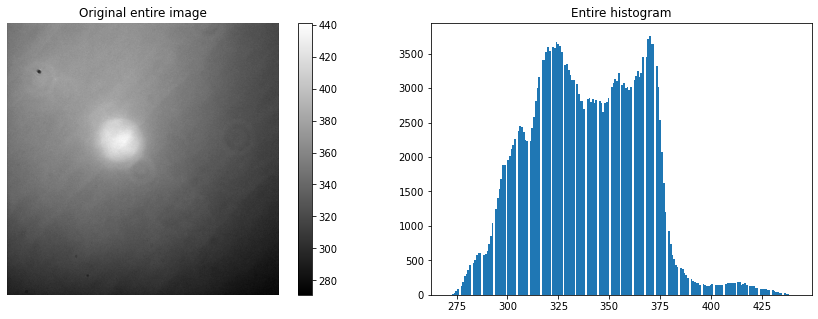

In [2]:
# Read the RICM image
RICM_img = io.imread("/home/ahmed/Work/Mariam/20210903pip3/AVG_Movie-08.tif")

#RICM_img = RICM_img - RICM_img.min()

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Original entire image')
plt.imshow(RICM_img, cmap = "gray")
plt.colorbar()

plt.subplot(122)
plt.title('Entire histogram')
plt.hist(RICM_img.ravel(), bins = 200);
#plt.xlim(290,1200);

/home/ahmed/Repositories/RICM-Vesicles/RICM_VESICLE.py:159: UserWarning: Image dtype is not float. By default denoise_nl_means will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.19 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  img_denoised = restoration.denoise_nl_means(self.img,


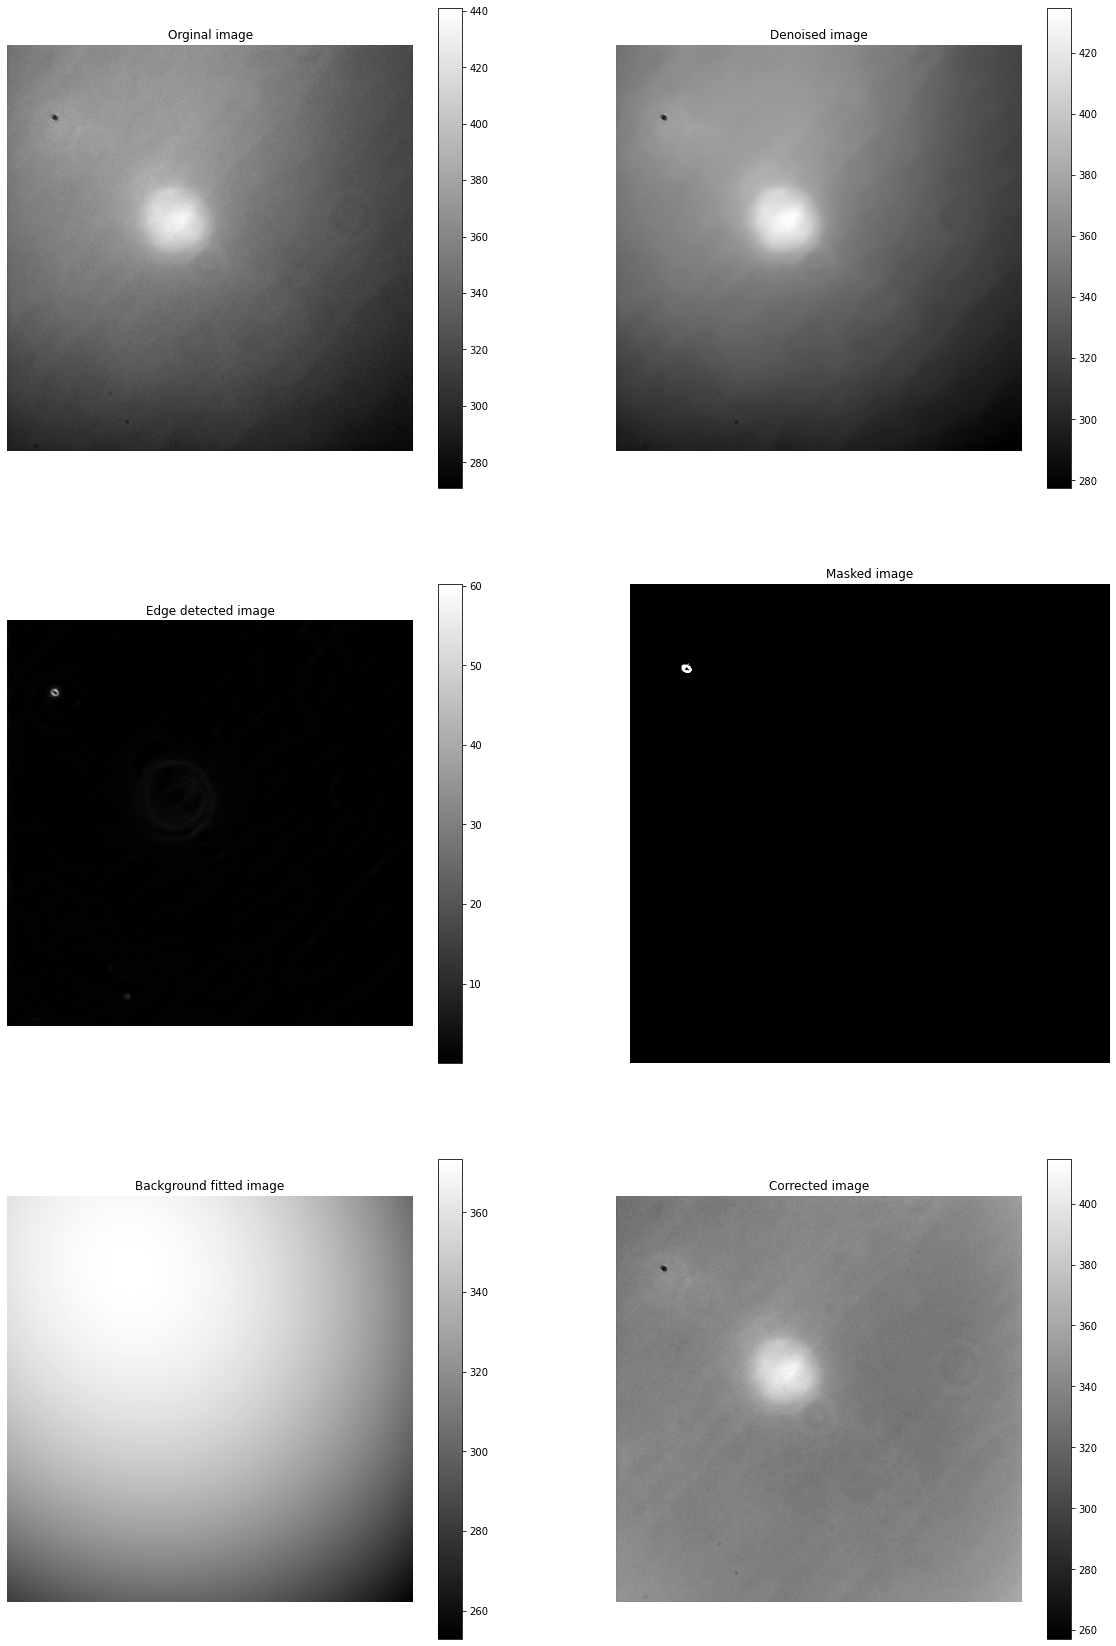

In [3]:
# Define the RICM class with certain n_inner
ricm = RICM(RICM_img, n_inner = 1.344, hole = 100)

# display results
plt.figure(figsize=(20,30))

plt.subplot(321)
plt.axis('off')
plt.title('Orginal image')
plt.imshow(RICM_img, cmap = "gray")
plt.colorbar()

plt.subplot(322)
plt.axis('off')
plt.title('Denoised image')
plt.imshow(ricm.nl_denoise() , cmap = 'gray')
plt.colorbar()

plt.subplot(323)
plt.axis('off')
plt.title('Edge detected image')
plt.imshow(ricm.edge_detection() , cmap = 'gray')
plt.colorbar()

plt.subplot(324)
plt.axis('off')
plt.title('Masked image')
plt.imshow(ricm.mask() , cmap = 'gray')

plt.subplot(325)
plt.axis('off')
plt.title('Background fitted image')
plt.imshow(ricm.background_fitting() , cmap = 'gray')
plt.colorbar()

plt.subplot(326)
plt.axis('off')
plt.title('Corrected image')
plt.imshow(ricm.correct() , cmap = 'gray')
plt.colorbar();

In [4]:
im = Image.fromarray(ricm.correct())
im.save('/home/ahmed/Work/Mariam/20210903pip3/AVG_Movie-08_corrected.tif')